<a href="https://colab.research.google.com/github/pavithradeepue/ASIET/blob/main/S5/ML_Lab/Regression/MultiVariable_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
try:
  boston_df = pd.read_csv('boston.csv')
except FileNotFoundError:
  print("Error: 'boston.csv' not found. Please ensure the dataset file is in the same directory as the script.")
  exit()

In [7]:
print("----------- Dataset Head -----------")
print(boston_df.head())
print("\n----------- Dataset Info -----------")
print(boston_df.info())


----------- Dataset Head -----------
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  

----------- Dataset Info -----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64

In [15]:
x = boston_df[['RM','LSTAT','PTRATIO']]
y = boston_df['MEDV']

In [17]:
print(f"Shape of predictor (x): {x.shape}")
print(f"Shape of target (y): {y.shape}")

Shape of predictor (x): (506, 3)
Shape of target (y): (506,)


Displaying scatter plots


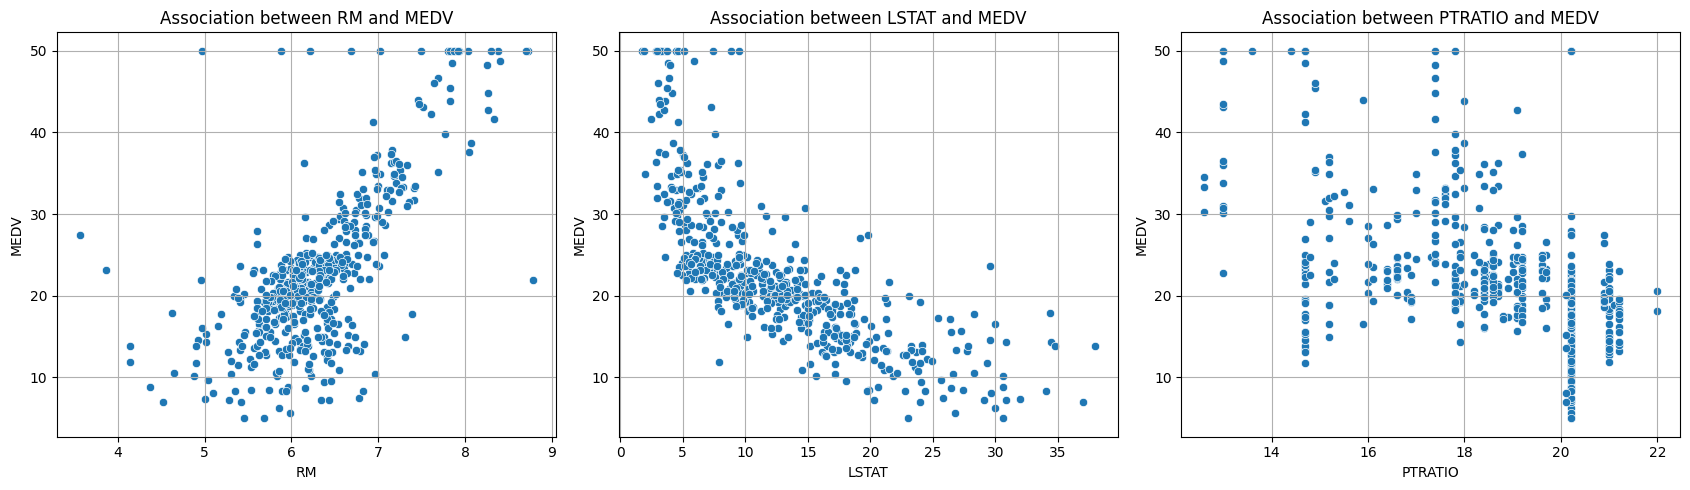

In [22]:
predictors = ['RM', 'LSTAT', 'PTRATIO']
target = 'MEDV'

plt.figure(figsize=(17, 5))

for i, predictor in enumerate(predictors):
    plt.subplot(1, len(predictors), i + 1)
    sns.scatterplot(x=predictor, y=target, data=boston_df)
    plt.title(f"Association between {predictor} and {target}")
    plt.xlabel(predictor)
    plt.ylabel(target)
    plt.grid(True)

plt.tight_layout()
print("Displaying scatter plots")
plt.show()


In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

print("----- Data Splitting -----")
print("Training set size:",len(x_train))
print("Testing set size:",len(x_test))

----- Data Splitting -----
Training set size: 339
Testing set size: 167


In [25]:
#Preprocessing
model = LinearRegression()
model.fit(x_train,y_train)
print("\n------- Model Training --------")
print("Multi Variable Regression model has been succesfully trained.")


------- Model Training --------
Multi Variable Regression model has been succesfully trained.


In [26]:
# m is sthe coefficient (slope)
# c is the intercept
intercept = model.intercept_
coefficient = model.coef_[0]

print("\n------- Model Parameters --------")
print(f"Intercept (c): {intercept:.4f}")
print(f"Coefficient for RM (m): {coefficient:.4f}")
print(f"The model equation is: MEDV = {coefficient:.4f} * RM + ({intercept:.4f})")


------- Model Parameters --------
Intercept (c): 18.8626
Coefficient for RM (m): 4.3193
The model equation is: MEDV = 4.3193 * RM + (18.8626)


In [27]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)

print("\n ---- Model Evalation ----")
print(f"(MSE) Training Set: {mse_train:.4f}")
print(f"(MSE) Testing Set: {mse_test:.4f}")
print("-" * 27)


 ---- Model Evalation ----
(MSE) Training Set: 28.2790
(MSE) Testing Set: 24.9837
---------------------------


In [28]:
#R - squared error
r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)

print("\n ---- Model Evalation ----")
print(f"Training Set: {r2_train:.4f}")
print(f"Testing Set: {r2_test:.4f}")
print("-" * 27)


 ---- Model Evalation ----
Training Set: 0.6792
Testing Set: 0.6699
---------------------------



Displaying Actual vs Predicted plot...


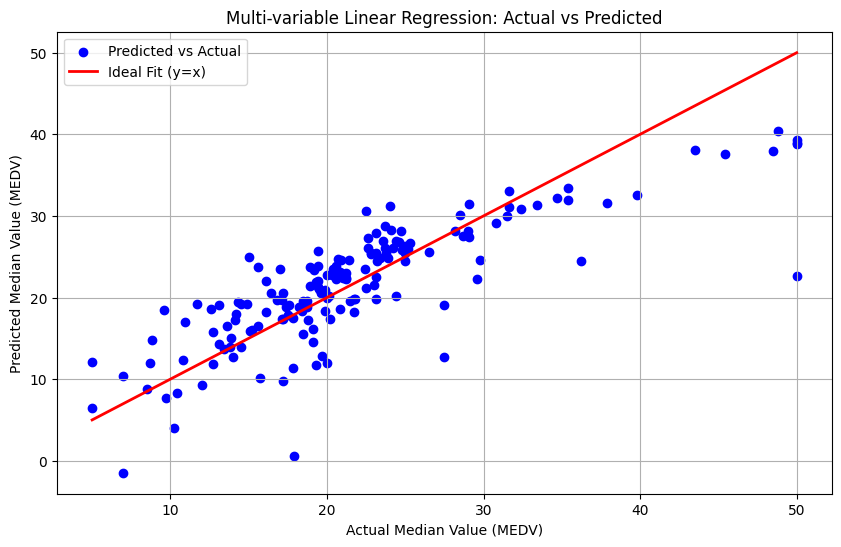

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit (y=x)')
plt.title('Multi-variable Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Median Value (MEDV)')
plt.ylabel('Predicted Median Value (MEDV)')
plt.legend()
plt.grid(True)
print("\nDisplaying Actual vs Predicted plot...")
plt.show()
